In [1]:
import pandas as pd

bw_df = pd.read_csv('C:\\Users\\ReDI\\Desktop\\KreativStorm\\Datasets\\Birthweight_reduced_kg_R.csv')

print(bw_df.columns)

Index(['ID', 'Length', 'Birthweight', 'Headcirc', 'Gestation', 'smoker',
       'mage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs', 'fnocig',
       'fheight', 'lowbwt', 'mage35'],
      dtype='object')


In [2]:
#Q1. What is the mean father’s age?


mean_fathers_age = bw_df['fage'].mean()

print(f"The mean father's age is: {mean_fathers_age:.2f}")


The mean father's age is: 28.90


In [3]:
#Q2. What is the mean father’s age for low birthweight babies?

low_bwt_df = bw_df[bw_df['lowbwt'] == 1]

# Calculate the mean father's age for low birthweight babies
mean_fathers_age_low_bwt = low_bwt_df['fage'].mean()

print(f"The mean father's age for low birthweight babies is: {mean_fathers_age_low_bwt:.2f}")


The mean father's age for low birthweight babies is: 24.83


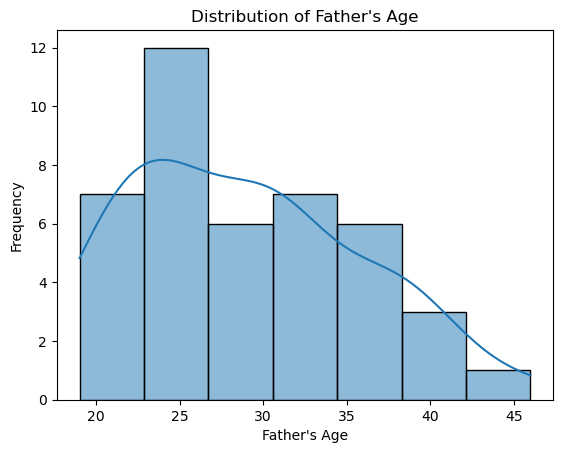

The father's age does not appear to be normally distributed (p-value = 0.038500070571899414 )


In [4]:
#Q3. Is the father's age normally distributed? Justify your answer.

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract the father's age column
father_age_data = bw_df['fage'].dropna()

# Plot a histogram to visualize the distribution
sns.histplot(father_age_data, kde=True)
plt.title("Distribution of Father's Age")
plt.xlabel("Father's Age")
plt.ylabel("Frequency")
plt.show()

# Perform the Shapiro-Wilk test for normality
statistic, p_value = shapiro(father_age_data)

# Check the p-value to determine normality
alpha = 0.05
if p_value > alpha:
    print("The father's age appears to be normally distributed (p-value =", p_value, ")")
else:
    print("The father's age does not appear to be normally distributed (p-value =", p_value, ")")


In [6]:
#Q4. If you apply the log transformation to the father's age, what is the mean score of the transformed variable?


import numpy as np

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract the father's age column
father_age_data = bw_df['fage'].dropna()

# Apply log transformation
father_age_log_transformed = np.log(father_age_data)

# Calculate the mean of the transformed variable
mean_transformed_father_age = father_age_log_transformed.mean()

print(f"The mean of the log-transformed father's age is: {mean_transformed_father_age:.2f}")


The mean of the log-transformed father's age is: 3.34


Skewness of the original distribution: 0.51
Skewness of the log-transformed distribution: 0.14
Shapiro-Wilk p-value for log-transformed variable: 0.1287

Original Mean: 28.90
Transformed Mean: 3.34


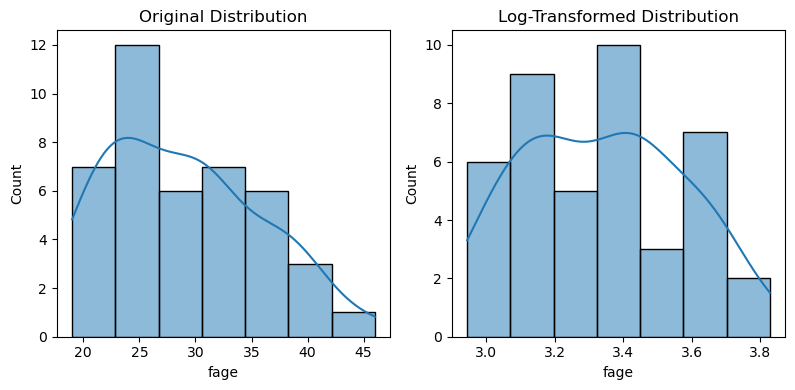

In [7]:
#Q5. Is the above mean score a good representation of the real value? Justify your answer.
#Q6. Is the new variable (log transform of father’s age) normally distributed? Justify your answer.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Load your dataset
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract the father's age data
father_age_data = bw_df['fage'].dropna()

# Visualize the original distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Distribution")
sns.histplot(father_age_data, kde=True)

# Check skewness of the original distribution
original_skewness = father_age_data.skew()
print(f"Skewness of the original distribution: {original_skewness:.2f}")

# Apply log transformation
father_age_log_transformed = np.log(father_age_data)

# Visualize the log-transformed distribution
plt.subplot(1, 3, 2)
plt.title("Log-Transformed Distribution")
sns.histplot(father_age_log_transformed, kde=True)

# Check skewness of the transformed distribution
transformed_skewness = father_age_log_transformed.skew()
print(f"Skewness of the log-transformed distribution: {transformed_skewness:.2f}")

# Perform Shapiro-Wilk test for normality on the transformed variable
statistic, p_value = shapiro(father_age_log_transformed)
print(f"Shapiro-Wilk p-value for log-transformed variable: {p_value:.4f}")

# Compare means of the original and transformed variables
original_mean = father_age_data.mean()
transformed_mean = father_age_log_transformed.mean()

print(f"\nOriginal Mean: {original_mean:.2f}")
print(f"Transformed Mean: {transformed_mean:.2f}")

# Show the plots
plt.tight_layout()
plt.show()


Skewness of 'years father was in education': -0.38
Shapiro-Wilk p-value for 'years father was in education': 0.0000


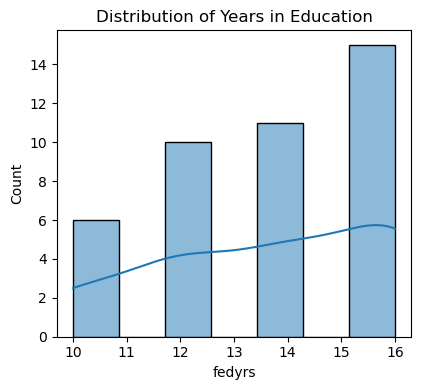

In [9]:
#Q7. Is the variable “years father was in education” normally distributed? 

import seaborn as sns
from scipy.stats import shapiro

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract the 'years father was in education' data
fedyrs_data = bw_df['fedyrs'].dropna()

# Visualize the distribution
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Distribution of Years in Education")
sns.histplot(fedyrs_data, kde=True)

# Check skewness
skewness_fedyrs = fedyrs_data.skew()
print(f"Skewness of 'years father was in education': {skewness_fedyrs:.2f}")

# Perform Shapiro-Wilk test for normality
statistic_fedyrs, p_value_fedyrs = shapiro(fedyrs_data)
print(f"Shapiro-Wilk p-value for 'years father was in education': {p_value_fedyrs:.4f}")

# Show the plot
plt.tight_layout()
plt.show()


'''
Q7. Is the variable “years father was in education” normally distributed? 

Based on the results, it is reasonable to conclude that the variable "years father was in education" is not normally distributed. 
The negative skewness and the low p-value from the Shapiro-Wilk test both suggest deviations from normality.

'''


In [10]:
#Q9. What is the mean score for the variable “years father was in education” after you apply the Box-Cox transformation?

import numpy as np
from scipy.stats import boxcox

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract the 'years father was in education' data
fedyrs_data = bw_df['fedyrs'].dropna()

# Apply the Box-Cox transformation and find the optimal lambda
transformed_data, lambda_value = boxcox(fedyrs_data)

# Calculate the mean of the transformed variable
mean_transformed_fedyrs = np.mean(transformed_data)

print(f"The mean of the Box-Cox transformed 'years father was in education': {mean_transformed_fedyrs:.2f}")
print(f"Optimal lambda value: {lambda_value:.4f}")


The mean of the Box-Cox transformed 'years father was in education': 157.97
Optimal lambda value: 2.2314


Shapiro-Wilk p-value for Box-Cox transformed variable: 0.0000


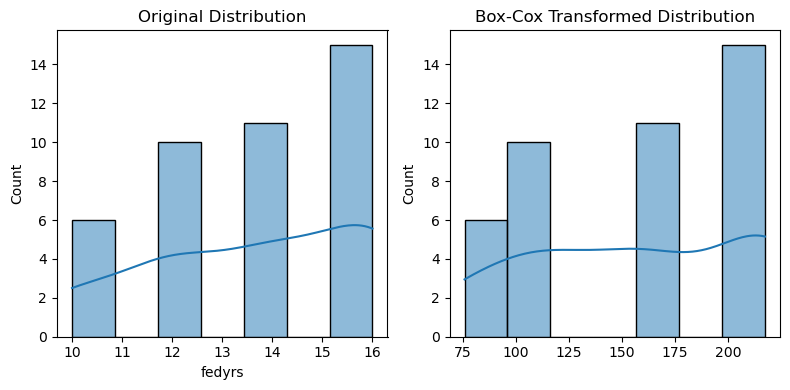

In [11]:
#Q10. Is this new variable normally distributed? Explain.

import seaborn as sns
from scipy.stats import shapiro
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract the 'years father was in education' data
fedyrs_data = bw_df['fedyrs'].dropna()

# Apply the Box-Cox transformation and find the optimal lambda
transformed_data, lambda_value = boxcox(fedyrs_data)

# Visualize the distribution of the transformed variable
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Distribution")
sns.histplot(fedyrs_data, kde=True)

plt.subplot(1, 2, 2)
plt.title("Box-Cox Transformed Distribution")
sns.histplot(transformed_data, kde=True)

# Perform Shapiro-Wilk test for normality on the transformed variable
statistic, p_value = shapiro(transformed_data)
print(f"Shapiro-Wilk p-value for Box-Cox transformed variable: {p_value:.4f}")

plt.tight_layout()
plt.show()


In [12]:
#Q11. What is the mean score for this new variable (B-C transformed fathers’ years in education) for mothers aged under 35?

import numpy as np
from scipy.stats import boxcox

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Define the condition for mothers aged under 35
condition = bw_df['mage35'] == 0  # Assuming 0 represents 'No' for mother over 35

# Extract fathers' years in education data for mothers aged under 35
fedyrs_under_35 = bw_df.loc[condition, 'fedyrs'].dropna()

# Apply the Box-Cox transformation and find the optimal lambda
transformed_data, lambda_value = boxcox(fedyrs_under_35)

# Calculate the mean of the transformed variable
mean_transformed_fedyrs_under_35 = np.mean(transformed_data)

print(f"The mean of Box-Cox transformed fathers' years in education for mothers aged under 35: {mean_transformed_fedyrs_under_35:.2f}")
print(f"Optimal lambda value: {lambda_value:.4f}")


The mean of Box-Cox transformed fathers' years in education for mothers aged under 35: 46.67
Optimal lambda value: 1.6756


In [13]:
#Q14. What is the direction of that relationship?



from scipy.stats import pearsonr

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract birth weight and father's age data
birth_weight = bw_df['Birthweight']
father_age = bw_df['fage']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(birth_weight, father_age)

# Determine the direction of the relationship
if correlation_coefficient > 0:
    direction = "positive"
elif correlation_coefficient < 0:
    direction = "negative"
else:
    direction = "no"

print(f"Pearson correlation coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Direction of the relationship: {direction}")


Pearson correlation coefficient: 0.1757
P-value: 0.2657
Direction of the relationship: positive


In [14]:
#Q18. Report on the above results including information about direction/form/degree of the relationship.

from scipy.stats import pointbiserialr

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Extract smoking and birth weight data
smoking = bw_df['smoker']  # Assuming 'smoker' is a binary variable (0 for non-smoker, 1 for smoker)
birth_weight = bw_df['Birthweight']

# Compute Point-Biserial correlation coefficient and p-value
correlation_coefficient, p_value = pointbiserialr(smoking, birth_weight)

# Print the results
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")


Point-Biserial Correlation Coefficient: -0.3142
P-value: 0.0427


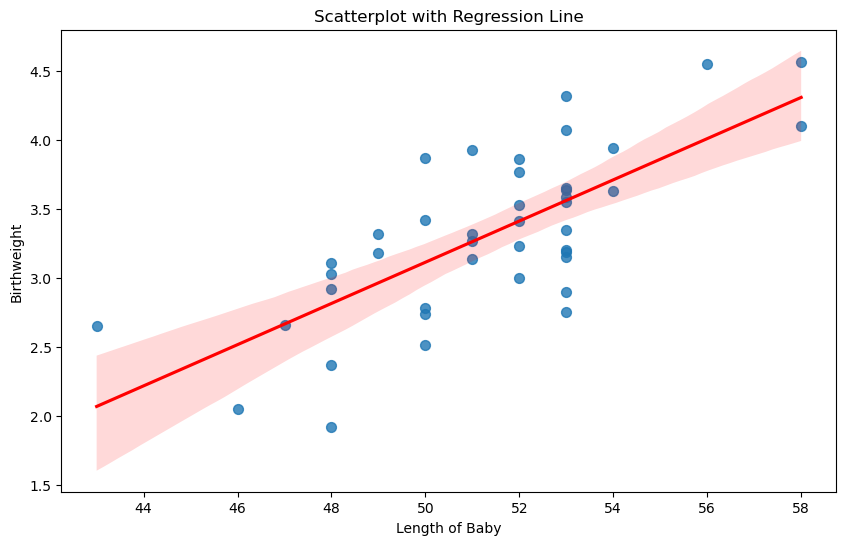

In [15]:
#Q20. In statistics, when creating a scatterplot, it is a common practice to put the independent variable on the x-axis and the dependent variable on the y-axis. 
# With this in mind, create a scatterplot for the above case and provide the regression line. For homework submitted using MS Word, insert a picture of the scatterplot.


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Create a scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Length', y='Birthweight', data=bw_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Scatterplot with Regression Line')
plt.xlabel('Length of Baby')
plt.ylabel('Birthweight')
plt.show()


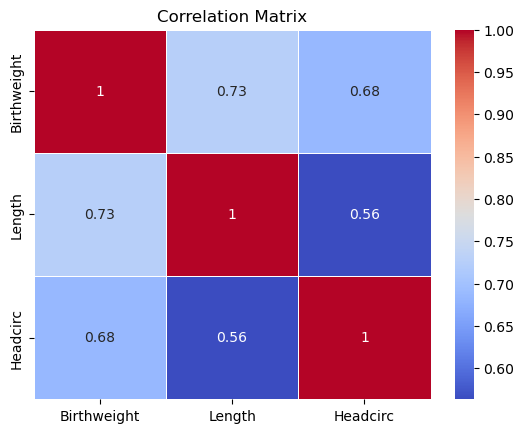

In [18]:
#Q23. Is there any evidence to suggest that the birth weight, length of baby, and head circumference are related?
#	Yes
#	No



import pandas as pd
import seaborn as sns

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Compute correlation matrix
correlation_matrix = bw_df[['Birthweight', 'Length', 'Headcirc']].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [20]:
#Q23 

#Compute correlation coefficients

import pandas as pd

# Assuming your dataset is stored in a variable named 'df'
# Replace 'your_dataset.csv' with the actual path or DataFrame name
# df = pd.read_csv('your_dataset.csv')

# Select the columns of interest
selected_columns = ['Birthweight', 'Length', 'Headcirc']

# Compute Pearson correlation coefficients
pearson_corr = bw_df[selected_columns].corr(method='pearson')

# Compute Spearman correlation coefficients
spearman_corr = bw_df[selected_columns].corr(method='spearman')

print("Pearson Correlation Coefficients:")
print(pearson_corr)

print("\nSpearman Correlation Coefficients:")
print(spearman_corr)


Pearson Correlation Coefficients:
             Birthweight    Length  Headcirc
Birthweight     1.000000  0.726833  0.684616
Length          0.726833  1.000000  0.563172
Headcirc        0.684616  0.563172  1.000000

Spearman Correlation Coefficients:
             Birthweight    Length  Headcirc
Birthweight     1.000000  0.683752  0.677260
Length          0.683752  1.000000  0.509078
Headcirc        0.677260  0.509078  1.000000
